# Projet Nuage de points 

Ce projet a pour but de tracer **le plan des moindres carrés** du nuage de points dont les coordonnées des points sont stockés dans le fichier **nuage_de_points.txt**

## Importation des données


In [8]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


# Configuration de l'affichage
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


# Nom du fichier texte 
nom_fichier = "nuage_de_points.txt"

# Initialisation des listes
X, Y, Z = [], [], []

with open(nom_fichier, 'r', encoding='utf-8') as fichier:
    lignes = fichier.readlines()

# Ignorer la première ligne (en-têtes)
for ligne in lignes[1:]:
    valeurs = ligne.strip().split()
    if len(valeurs) == 3:
        # Remplacer la virgule par un point avant conversion
        valeurs = [v.replace(',', '.') for v in valeurs]
        x, y, z = map(float, valeurs)
        X.append(x)
        Y.append(y)
        Z.append(z)

#Verification 
print("Verification")
print("X =", X)
print("Y =", Y)
print("Z =", Z)



Verification
X = [1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0]
Y = [1.0, 2.0, 3.0, 4.0, 5.0, 1.0, 2.0, 3.0, 4.0, 5.0, 1.0, 2.0, 3.0, 4.0, 5.0, 1.0, 2.0, 3.0, 4.0, 5.0, 1.0, 2.0, 3.0, 4.0, 5.0]
Z = [-2.083333333, -3.45, -4.066666667, -4.083333333, -4.9, -3.166666667, -3.633333333, -3.7, -4.516666667, -5.533333333, -2.5, -3.966666667, -4.783333333, -5.15, -6.066666667, -3.733333333, -4.0, -4.166666667, -5.133333333, -6.1, -3.366666667, -4.683333333, -5.0, -5.166666667, -6.333333333]


## Plan des moindres carrés

Pour déterminer le **plan des moindres carrés** (ou **plan de régression linéaire**) à partir d’un ensemble de points  X_i, Y_i, Z_i,  
on cherche l’équation d’un plan de la forme :

\[
Z = aX + bY + c
\]

Donc l'objectif c'est de déterminer a, b et c grace a la librairie *LinearRegression*

Équation du plan: Z = -0.2903*X + -0.6497*Y + -1.5513


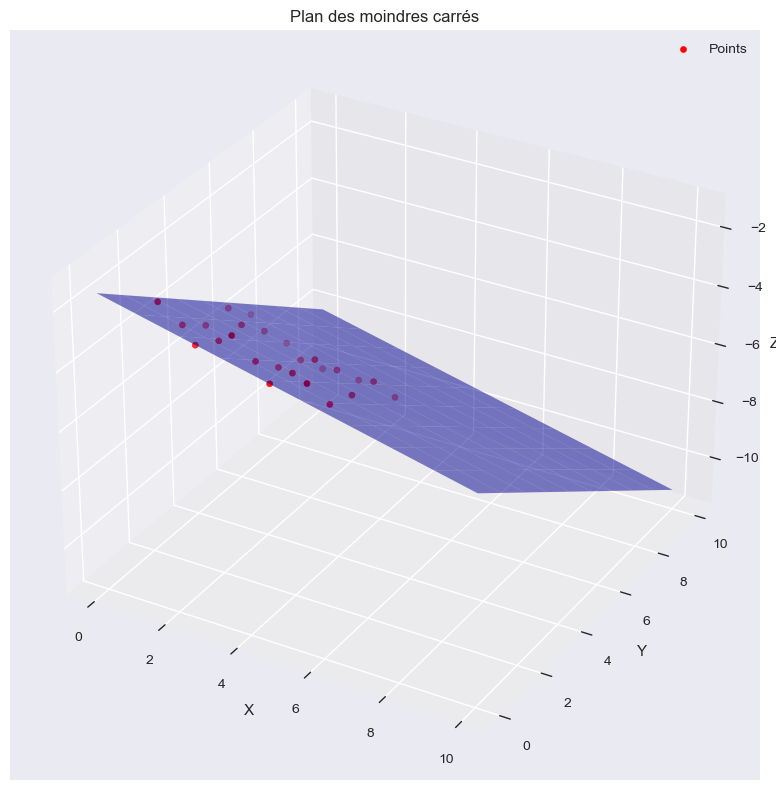

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

#les valeurs décimales utilisent des virgules (,) au lieu de points (.).
#En Python, float() ne comprend que les nombres avec un point décimal, pas une virgule.

def convert_to_float(value):
    if isinstance(value, str):
        return float(value.replace(',', '.'))
    return value

X = np.array([convert_to_float(x) for x in X]) if 'X' in locals() else np.linspace(0, 10, 20)
Y = np.array([convert_to_float(y) for y in Y]) if 'Y' in locals() else np.linspace(0, 10, 20)
Z = np.array([convert_to_float(z) for z in Z]) if 'Z' in locals() else X + Y + np.random.normal(0, 1, size=len(X))


# Préparation des données pour la régression
X_train = np.column_stack((X, Y))

# Calcul du plan de moindre carré avec régression linéaire
reg = LinearRegression().fit(X_train, Z)
a = reg.coef_[0]  # Coefficient pour X
b = reg.coef_[1]  # Coefficient pour Y
c = reg.intercept_  # Constante

print(f"Équation du plan: Z = {a:.4f}*X + {b:.4f}*Y + {c:.4f}")

# Création d'une grille pour afficher le plan
x_surf, y_surf = np.meshgrid(np.linspace(0, 10, 10), np.linspace(0, 10, 10))
z_surf = a * x_surf + b * y_surf + c

# Visualisation 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Affichage des points
ax.scatter(X, Y, Z, color='red', label='Points')

# Affichage du plan
ax.plot_surface(x_surf, y_surf, z_surf, alpha=0.5, color='blue')

# Paramètres d'affichage
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Plan des moindres carrés')
ax.legend()

plt.tight_layout()
plt.show()